In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings as w
w.filterwarnings('ignore')

In [49]:
ABSOLUTE_PATH = "C:\\Users\\rudnf\\vscode\\Graduation\\Data_Preprocessing\\data\\"
SEASON = "spring"
MONTH = "01"
K = 50

In [50]:
df = pd.read_csv(ABSOLUTE_PATH + f"\\frequency_of_stay_data\\spot_{MONTH}.csv")
df    

,xcoord,ycoord
0,882375,1489375
1,882775,1489775
2,882775,1489725
3,882875,1489925
4,882925,1489925
...,...,...
635,947525,1496825
636,947575,1497225
637,947575,1496875
638,947575,1496825


In [51]:
from pyproj import Transformer

# 원래 좌표계 (EPSG:5179)와 변환할 좌표계 (EPSG:4326)의 Transformer 객체 생성
transformer = Transformer.from_crs("EPSG:5179", "EPSG:4326", always_xy=True)

# # CSV 파일 로드
# df = pd.read_csv(f'../data/2021_07_POI_{K}.csv')

# 좌표 변환
df[['lon', 'lat']] = df.apply(lambda row: transformer.transform(row['xcoord'], row['ycoord']), axis=1).apply(pd.Series)
df

,xcoord,ycoord,lon,lat
0,882375,1489375,126.235299,33.389565
1,882775,1489775,126.239547,33.393216
2,882775,1489725,126.239553,33.392765
3,882875,1489925,126.240602,33.394579
4,882925,1489925,126.241140,33.394585
...,...,...,...,...
635,947525,1496825,126.935307,33.461921
636,947575,1497225,126.935822,33.465531
637,947575,1496875,126.935842,33.462374
638,947575,1496825,126.935845,33.461923


In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=0).fit(df[['lon','lat']])
# y_kmeans = kmeans.fit_predict(x)
kmeans

KMeans(n_clusters=50, random_state=0)

In [53]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['lon', 'lat'])
centroids_x = kmeans.cluster_centers_[:, 0]
centroids_y = kmeans.cluster_centers_[:, 1]
for i in range(len(centroids_x)):
    print(f"Centroid {i+1}: ({centroids_x[i]}, {centroids_y[i]})")

Centroid 1: (126.24299019060365, 33.39566450785274)
Centroid 2: (126.68447211004727, 33.39648682960735)
Centroid 3: (126.48706685898091, 33.4663484733013)
Centroid 4: (126.91722161687568, 33.44865857263963)
Centroid 5: (126.55661664899081, 33.24240947485643)
Centroid 6: (126.4098625070672, 33.25260949474043)
Centroid 7: (126.498346022398, 33.49847620924042)
Centroid 8: (126.7664152163787, 33.52988370499878)
Centroid 9: (126.3865649449766, 33.48548916318275)
Centroid 10: (126.36192545237913, 33.28408266375596)
Centroid 11: (126.30978264387166, 33.46059588659809)
Centroid 12: (126.63490291638153, 33.30313795454075)
Centroid 13: (126.67067003458915, 33.543011851606295)
Centroid 14: (126.28986860775366, 33.2062992246559)
Centroid 15: (126.83293058665838, 33.46355435295665)
Centroid 16: (126.83039397177906, 33.32105253163634)
Centroid 17: (126.31701588357237, 33.34933375925366)
Centroid 18: (126.2889915189111, 33.30491562305184)
Centroid 19: (126.4629179471993, 33.357596344687906)
Centroid 

In [54]:
centroids

,lon,lat
0,126.242990,33.395665
1,126.684472,33.396487
2,126.487067,33.466348
3,126.917222,33.448659
4,126.556617,33.242409
5,126.409863,33.252609
6,126.498346,33.498476
7,126.766415,33.529884
8,126.386565,33.485489
9,126.361925,33.284083


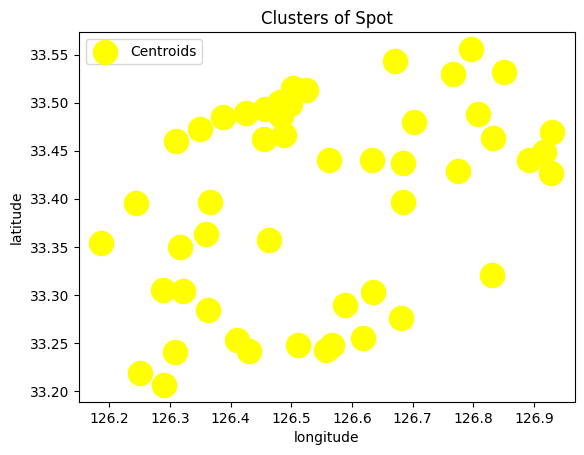

In [55]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Spot')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.show()

In [50]:
# 변환된 좌표로 업데이트된 CSV 파일 저장
centroids.to_csv(ABSOLUTE_PATH + "\\frequency_of_stay_data\\cluster_data\\"+ SEASON + f"\\{SEASON}_cluster_{K}.csv", index=False)

In [ ]:
# Elbow Method
cluster_range = range(1, K)
inertia = []

# 각 클러스터 개수에 대한 KMeans 모델 생성 및 학습
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42).fit(df[['lon','lat']])
    inertia.append(kmeans.inertia_)

# Elbow 메소드를 시각화하여 최적 클러스터 개수 찾기
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


## 전체 코드 돌리기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyproj import Transformer
from sklearn.cluster import KMeans
import warnings as w
import glob
import os
w.filterwarnings('ignore')

ABSOLUTE_PATH = "C:\\Users\\rudnf\\vscode\\Graduation\\Data_Preprocessing\\data\\"

# 계절 지정
SEASONS = ["spring", "summer", "fall", "winter"]

# Clustering 수 지정
KS = [20, 35, 50]

def season_match(season):
    months = []
    if season == "spring":
        months = ["03", "04", "05"]
    if season == "summer":
        months = ["06", "07", "08"]
    if season == "fall":
        months = ["09", "10", "11"]
    if season == "winter":
        months = ["12", "01", "02"]
    return months


for season in SEASONS:
    months = season_match(season)
    # 디렉토리 내의 모든 CSV 파일 경로 가져오기
    csv_files = glob.glob(ABSOLUTE_PATH + 'frequency_of_stay_data\\*.csv')
    
    df_list = []
    
    for csv_file in csv_files:
        # CSV 파일경로에서 파일명 추출
        file_name = os.path.basename(csv_file)
        
        for month in months:
            # 해당 월이 원하는 계절에 포함되는지 확인
            if f"spot_{month}.csv" == file_name:
                month_df = pd.read_csv(csv_file)
                df_list.append(month_df)
    # 리스트에 있는 모든 DataFrame을 연결(concatenate)
    season_df = pd.concat(df_list, ignore_index=True)
    
    for k in KS:
        # 원래 좌표계 (EPSG:5179)와 변환할 좌표계 (EPSG:4326)의 Transformer 객체 생성
        transformer = Transformer.from_crs("EPSG:5179", "EPSG:4326", always_xy=True)

        # 좌표 변환
        season_df[['lon', 'lat']] = season_df.apply(lambda row: transformer.transform(row['xcoord'], row['ycoord']), axis=1).apply(pd.Series)

        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0).fit(season_df[['lon','lat']])
        centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['lon', 'lat'])
        centroids.to_csv(ABSOLUTE_PATH + f"frequency_of_stay_data\\cluster_data\\{season}\\{season}_cluster_{k}.csv", index=False)
        
    